In [1]:
# Self imports
from src.eclipses import *
from src import *
from src.plotting import *
from src.cpop import *

C:\Users\prann\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\prann\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\prann\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
eclipses = get_eclipses("kplr006545018.fits", "../data/combined")
eclipses

,time,duration,delta
0,1.000000,0.183911,2.002586
2,3.002586,0.183911,1.982151
4,4.984736,0.183911,2.002585
6,6.987321,0.183911,2.002584
8,8.989905,0.183911,2.002583
...,...,...,...
1348,1441.914029,0.183909,2.002569
1350,1443.916598,0.183909,1.982137
1352,1445.898734,0.183910,2.002573
1354,1447.901307,0.183910,7.989864


<AxesSubplot:title={'center':'Eclipse Timing Variations'}, xlabel='Time (days)', ylabel='Change in Eclipse Time'>

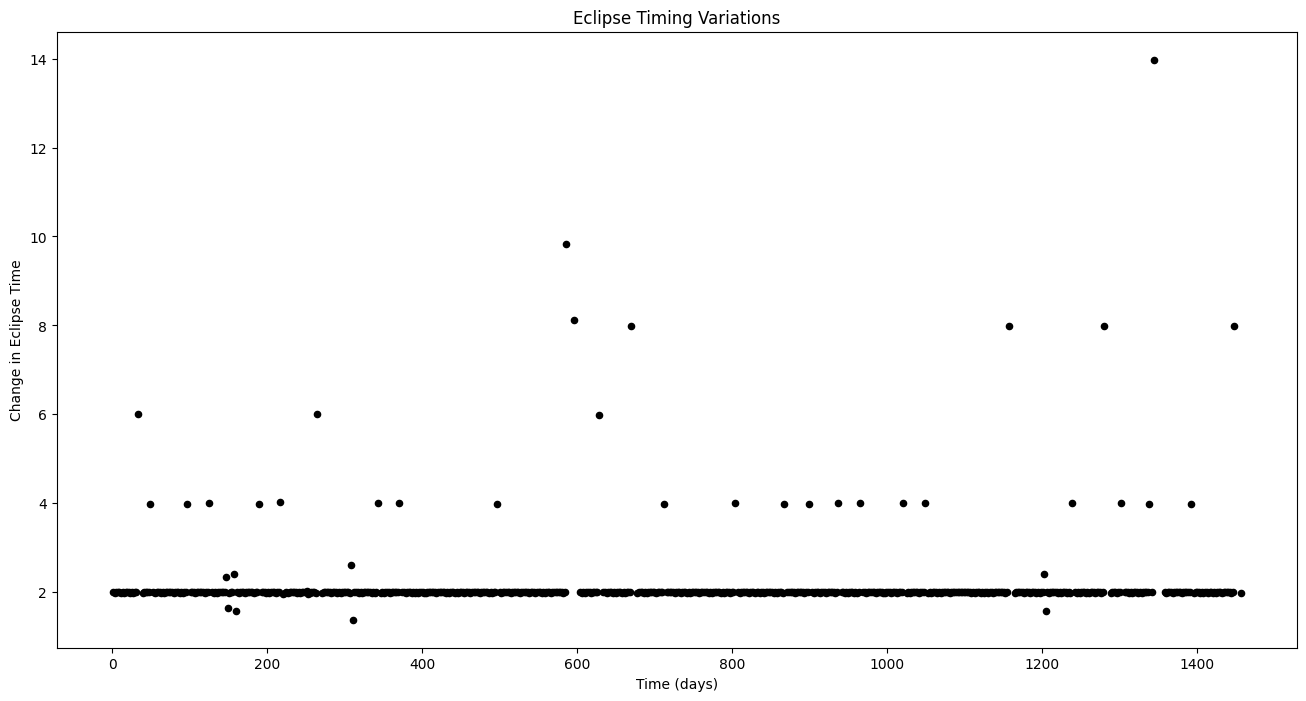

In [3]:
eclipses.plot.scatter(
    x = "time", y="delta", color="black",
    title="Eclipse Timing Variations", xlabel = 'Time (days)', ylabel = 'Change in Eclipse Time',
    figsize=(16, 8), legend=False
)

In [8]:
from src.noise_filtering import *

filtered, diagnostics = complete_filter(eclipses, "delta", return_diagnositics=True)
filtered

,time,duration,delta
0,1.000000,0.183911,2.002586
1,3.002586,0.183911,1.982151
2,4.984736,0.183911,2.002585
3,6.987321,0.183911,2.002584
4,8.989905,0.183911,2.002583
...,...,...,...
634,1439.911461,0.183909,2.002567
635,1441.914029,0.183909,2.002569
636,1443.916598,0.183909,1.982137
637,1445.898734,0.183910,2.002573


<AxesSubplot:title={'center':'Eclipse Timing Variations'}, xlabel='Time (days)', ylabel='Change in Eclipse Time'>

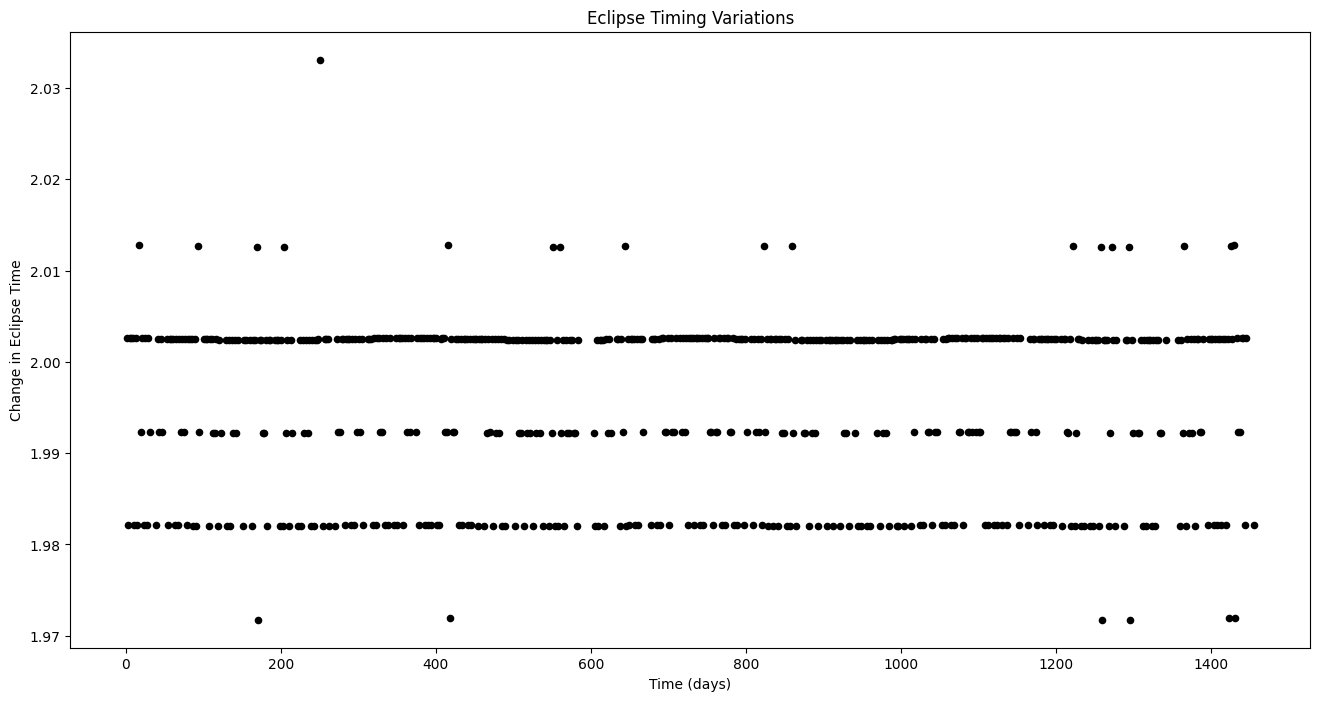

In [10]:
filtered.plot.scatter(
    x = "time", y="delta", color="black",
    title="Eclipse Timing Variations", xlabel = 'Time (days)', ylabel = 'Change in Eclipse Time',
    figsize=(16, 8), legend=False
)

In [13]:
filtered, period, diagnostics = getOC(eclipses, return_diagnostics=True)
filtered

,time,duration,delta,residuals,culled_residuals
0,1.000000,0.183911,2.002586,0.000000,0.000978
1,3.002586,0.183911,1.982151,0.006857,0.001747
2,4.984736,0.183911,2.002585,-0.006721,0.002479
3,6.987321,0.183911,2.002584,0.000136,0.003159
4,8.989905,0.183911,2.002583,0.006991,0.003771
...,...,...,...,...,...
634,1439.911461,0.183909,2.002567,-0.008707,-0.002906
635,1441.914029,0.183909,2.002569,-0.001868,-0.002175
636,1443.916598,0.183909,1.982137,0.004972,-0.001404
637,1445.898734,0.183910,2.002573,-0.008619,-0.000612


In [14]:
period

1.9957283891838626

In [15]:
diagnostics

(3, 37, False, 0)

<AxesSubplot:title={'center':'O-C Curve'}, xlabel='Time (days)', ylabel='Residuals'>

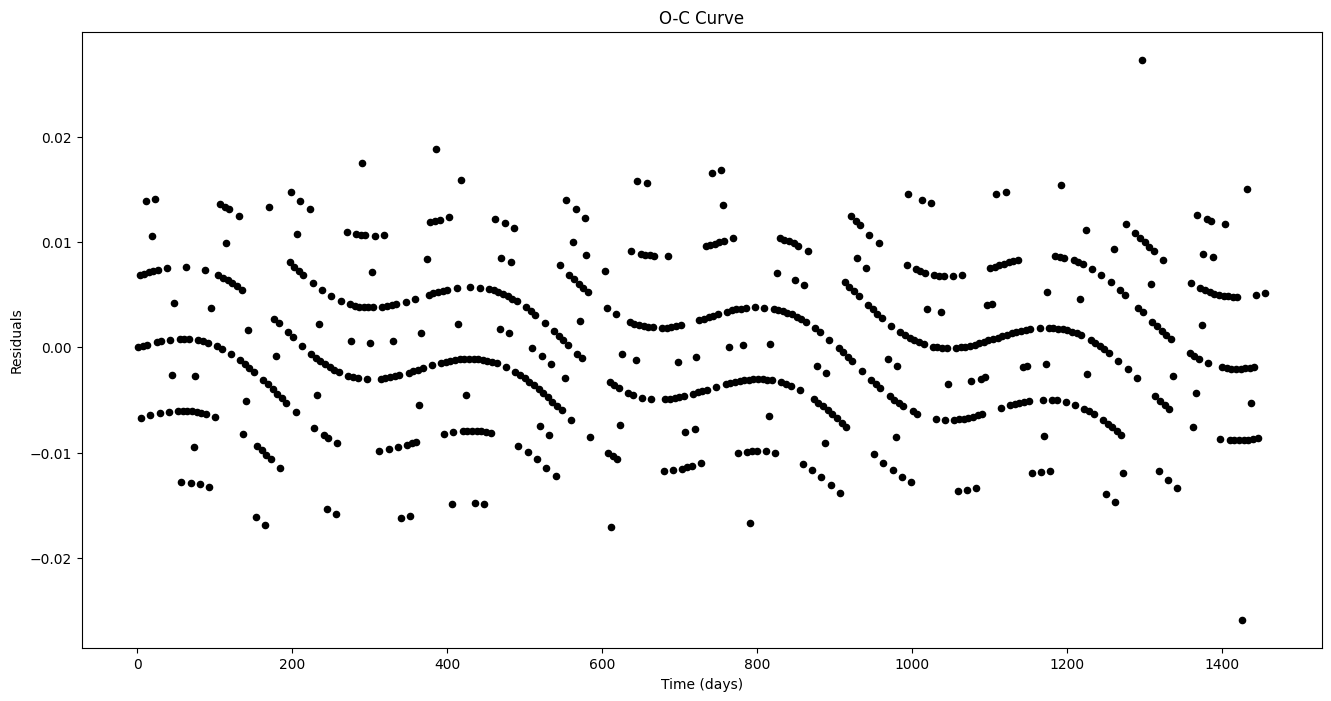

In [16]:
filtered.plot.scatter(
    x = "time", y="residuals", color="black",
    title="O-C Curve", xlabel = 'Time (days)', ylabel = 'Residuals',
    figsize=(16, 8), legend=False
)

<AxesSubplot:title={'center':'(Culled) O-C Curve'}, xlabel='Time (days)', ylabel='(Culled) Residuals'>

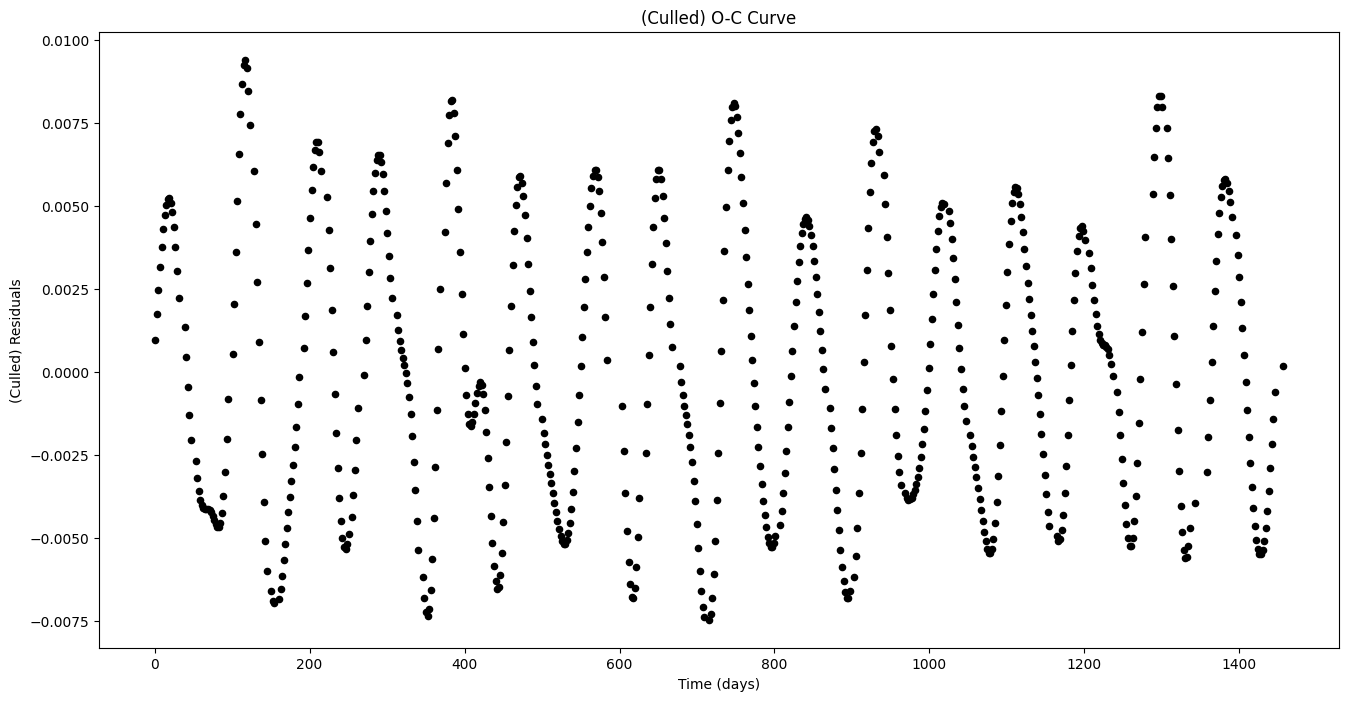

In [17]:
filtered.plot.scatter(
    x = "time", y="culled_residuals", color="black",
    title="(Culled) O-C Curve", xlabel = 'Time (days)', ylabel = '(Culled) Residuals',
    figsize=(16, 8), legend=False
)